In [1]:
import torch
from pytorch_pretrained_bert import BertTokenizer

In [2]:
# loading pretrained BERT tokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Inspect BERT Vocab

## Dump Vocab

In [3]:
with open('vocabulary.txt','w') as f:
    
    for token in tokenizer.vocab.keys():
        f.write(token+'\n')

From perusing the vocab, I'm seeing that:

* The first 999 tokens (1-indexed) appear to be reserved, and most are of the form [unused957].
    * 1   - [PAD]
    * 101 - [UNK]
    * 102 - [CLS]
    * 103 - [SEP]
    * 104 - [MASK]
* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.
    * The last whole word is at 29612, "necessitated"

Some funny inclusions:
* starbucks
* triassic
* abolitionist
* 1679

In [13]:
list(tokenizer.vocab.keys())[90:108]

['[unused89]',
 '[unused90]',
 '[unused91]',
 '[unused92]',
 '[unused93]',
 '[unused94]',
 '[unused95]',
 '[unused96]',
 '[unused97]',
 '[unused98]',
 '[UNK]',
 '[CLS]',
 '[SEP]',
 '[MASK]',
 '[unused99]',
 '[unused100]',
 '[unused101]',
 '[unused102]']

In [14]:
# [UNK] is present because not every unicode character is included in the vocabulary
# [CLS] [SEP] [MASK] are specific to BERT architecture, discussed later while discussing input

In [15]:
list(tokenizer.vocab.keys())[990:1020]

['[unused985]',
 '[unused986]',
 '[unused987]',
 '[unused988]',
 '[unused989]',
 '[unused990]',
 '[unused991]',
 '[unused992]',
 '[unused993]',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5']

In [ ]:
list(tokenizer.vocab.keys())[1990:2000]
# seems like sorted by frequency since 'the' is a very common word

['－', '．', '／', '：', '？', '～', 'the', 'of', 'and', 'in']

In [27]:
list(tokenizer.vocab.keys())[29000:-100]

['gunners',
 '##jhl',
 '##zko',
 'agile',
 'hysteria',
 '##lten',
 '##rcus',
 'bukit',
 'champs',
 'chevy',
 'cuckoo',
 'leith',
 'sadler',
 'theologians',
 'welded',
 '##section',
 '1663',
 'jj',
 'plurality',
 'xander',
 '##rooms',
 '##formed',
 'shredded',
 'temps',
 'intimately',
 'pau',
 'tormented',
 '##lok',
 '##stellar',
 '1618',
 'charred',
 'ems',
 'essen',
 '##mmel',
 'alarms',
 'spraying',
 'ascot',
 'blooms',
 'twinkle',
 '##abia',
 '##apes',
 'internment',
 'obsidian',
 '##chaft',
 'snoop',
 '##dav',
 '##ooping',
 'malibu',
 '##tension',
 'quiver',
 '##itia',
 'hays',
 'mcintosh',
 'travers',
 'walsall',
 '##ffie',
 '1623',
 'beverley',
 'schwarz',
 'plunging',
 'structurally',
 'm3',
 'rosenthal',
 'vikram',
 '##tsk',
 '770',
 'ghz',
 '##onda',
 '##tiv',
 'chalmers',
 'groningen',
 'pew',
 'reckon',
 'unicef',
 '##rvis',
 '55th',
 '##gni',
 '1651',
 'sulawesi',
 'avila',
 'cai',
 'metaphysical',
 'screwing',
 'turbulence',
 '##mberg',
 'augusto',
 'samba',
 '56th',
 'baf

# Checking for single character tokens in vocabulary

In [28]:
one_chars = [] 
one_chars_hashes = []

for token in tokenizer.vocab.keys():
    
    if len(token) == 1:
        one_chars.append(token)
        
    elif len(token) == 3 and token[0:2] == '##':
        one_chars_hashes.append(token)

In [29]:
len(one_chars), len(one_chars_hashes)

(997, 997)

In [30]:
sorted(one_chars)[:10], sorted(one_chars_hashes)[:10]

(['!', '"', '#', '$', '%', '&', "'", '(', ')', '*'],
 ['##!', '##"', '###', '##$', '##%', '##&', "##'", '##(', '##)', '##*'])

### Inference: For every single character, there exists a subword starting with ##

In [32]:
# print all single characters

for i in range(0, len(one_chars), 80):
    end = min(i+80, len(one_chars)+1)
    print(''.join(one_chars[i:end]))

!"#$%&'()*+,-./0123456789:;<=>?@[\]^_`abcdefghijklmnopqrstuvwxyz{|}~¡¢£¤¥¦§¨©ª«¬
®°±²³´µ¶·¹º»¼½¾¿×ßæð÷øþđħıłŋœƒɐɑɒɔɕəɛɡɣɨɪɫɬɯɲɴɹɾʀʁʂʃʉʊʋʌʎʐʑʒʔʰʲʳʷʸʻʼʾʿˈːˡˢˣˤαβγδ
εζηθικλμνξοπρςστυφχψωабвгдежзиклмнопрстуфхцчшщъыьэюяђєіјљњћӏաբգդեթիլկհմյնոպսվտրւ
ք־אבגדהוזחטיךכלםמןנסעףפץצקרשת،ءابةتثجحخدذرزسشصضطظعغـفقكلمنهوىيٹپچکگںھہیےअआउएकखगच
जटडणतथदधनपबभमयरलवशषसहािीो।॥ংঅআইউএওকখগচছজটডণতথদধনপবভমযরলশষসহািীেகசடதநனபமயரலளவாிுே
ைನರಾකයරලවාกงตทนพมยรลวสอาเ་།གངདནཔབམའརལསမაბგდევთიკლმნორსტუᄀᄂᄃᄅᄆᄇᄉᄊᄋᄌᄎᄏᄐᄑ하ᅢᅥᅦᅧᅩᅪᅭᅮ
ᅯᅲᅳᅴᅵᆨᆫᆯᆷᆸᆼᴬᴮᴰᴵᴺᵀᵃᵇᵈᵉᵍᵏᵐᵒᵖᵗᵘᵢᵣᵤᵥᶜᶠ‐‑‒–—―‖‘’‚“”„†‡•…‰′″›‿⁄⁰ⁱ⁴⁵⁶⁷⁸⁹⁺⁻ⁿ₀₁₂₃₄₅₆₇₈₉₊₍
₎ₐₑₒₓₕₖₗₘₙₚₛₜ₤₩€₱₹ℓ№ℝ™⅓⅔←↑→↓↔↦⇄⇌⇒∂∅∆∇∈−∗∘√∞∧∨∩∪≈≡≤≥⊂⊆⊕⊗⋅─│■▪●★☆☉♠♣♥♦♭♯⟨⟩ⱼ⺩⺼⽥、。〈〉
《》「」『』〜あいうえおかきくけこさしすせそたちっつてとなにぬねのはひふへほまみむめもやゆよらりるれろをんァアィイウェエオカキクケコサシスセタチッツテトナニノハ
ヒフヘホマミムメモャュョラリルレロワン・ー一三上下不世中主久之也事二五井京人亻仁介代仮伊会佐侍保信健元光八公内出分前劉力加勝北区十千南博原口古史司合吉同名和囗四
国國土地坂城堂場士夏外大天太夫奈女子学宀宇安宗定宣宮家宿寺將小尚山岡島崎川州巿帝平年幸广弘張彳後御德心忄志忠愛成我戦戸手扌政文新方日明星春昭智曲書月有朝木本李村
東松林森楊樹橋歌止正武比氏民水氵氷永江沢河治法海清漢瀬火版犬王生田男疒発白的皇目相省真石示社神福禾秀秋空立章竹糹美義耳良艹花英華葉藤行街西見訁語谷貝貴車軍辶道郎
郡部都里野金鈴镇長門間阝阿陳陽雄青面風食香馬高龍龸ﬁﬂ！

In [34]:
len(tokens)+1

998

In [41]:
# print all single characters with hashes

tokens = [token.replace("##",'') for token in one_chars_hashes]

for i in range(0, len(tokens), 80):
    print(i)
    end = min(i+80, len(tokens)+1)
    print(''.join(tokens[i:end]))

# This also seems to be sorted by frequency since 's' is the most common subword

0
saeinodrytlmuhkcgp2z1b3f467xv8590wjq°₂аи²₃ı₁⁺½оهيαеدنνøр₄₀رя³ιłнᵢₙßةςم−тːلьк♭ηیв
80
ا×¹ыהɛл!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~¡¢£¤¥¦§¨©ª«¬®±´µ¶·º»¼¾¿æð÷þđħŋœƒɐɑɒɔɕəɡɣɨ
160
ɪɫɬɯɲɴɹɾʀʁʂʃʉʊʋʌʎʐʑʒʔʰʲʳʷʸʻʼʾʿˈˡˢˣˤβγδεζθκλμξοπρστυφχψωбгджзмпсуфхцчшщъэюђєіјљњћ
240
ӏաբգդեթիլկհմյնոպսվտրւք־אבגדוזחטיךכלםמןנסעףפץצקרשת،ءبتثجحخذزسشصضطظعغـفقكوىٹپچکگںھ
320
ہےअआउएकखगचजटडणतथदधनपबभमयरलवशषसहािीो।॥ংঅআইউএওকখগচছজটডণতথদধনপবভমযরলশষসহািীেகசடதநனப
400
மயரலளவாிுேைನರಾකයරලවාกงตทนพมยรลวสอาเ་།གངདནཔབམའརལསမაბგდევთიკლმნორსტუᄀᄂᄃᄅᄆᄇᄉᄊᄋᄌᄎᄏᄐᄑ
480
하ᅢᅥᅦᅧᅩᅪᅭᅮᅯᅲᅳᅴᅵᆨᆫᆯᆷᆸᆼᴬᴮᴰᴵᴺᵀᵃᵇᵈᵉᵍᵏᵐᵒᵖᵗᵘᵣᵤᵥᶜᶠ‐‑‒–—―‖‘’‚“”„†‡•…‰′″›‿⁄⁰ⁱ⁴⁵⁶⁷⁸⁹⁻ⁿ₅₆₇₈
560
₉₊₍₎ₐₑₒₓₕₖₗₘₚₛₜ₤₩€₱₹ℓ№ℝ™⅓⅔←↑→↓↔↦⇄⇌⇒∂∅∆∇∈∗∘√∞∧∨∩∪≈≡≤≥⊂⊆⊕⊗⋅─│■▪●★☆☉♠♣♥♦♯⟨⟩ⱼ⺩⺼⽥、。〈〉
640
《》「」『』〜あいうえおかきくけこさしすせそたちっつてとなにぬねのはひふへほまみむめもやゆよらりるれろをんァアィイウェエオカキクケコサシスセタチッツテトナニノハ
720
ヒフヘホマミムメモャュョラリルレロワン・ー一三上下不世中主久之也事二五井京人亻仁介代仮伊会佐侍保信健元光八公内出分前劉力加勝北区十千南博原口古史司合吉同名和囗四
800
国國土地坂城堂場士夏外大天太夫奈女子学宀宇安宗定宣宮家宿寺將小尚山岡島崎川州巿帝平年幸广弘張彳後御德心忄志忠愛成我戦戸手扌政文新方日明星春昭智曲書月有朝木本李村
880
東松林森楊樹橋歌止正武比氏民水氵氷永江沢河治法海清漢瀬火版犬王生田男疒発白的皇目相省真石示社神福禾秀秋空立章竹糹美義耳良艹花英華

In [39]:
set(one_chars) == set(tokens)

True

# Subwords and whole words

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
token_lengths = [len(token) for token in tokenizer.vocab.keys()]
len(token_lengths)

30522

Maximum token length: 18


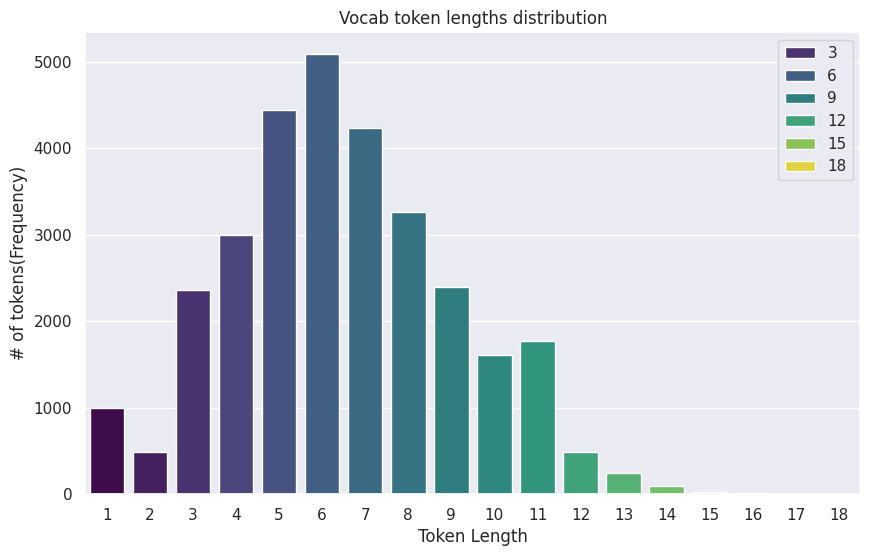

In [56]:
sns.set_theme(style='darkgrid')

plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot
sns.countplot(x=token_lengths, palette="viridis", hue = token_lengths)
plt.title("Vocab token lengths distribution")
plt.xlabel("Token Length")
plt.ylabel("# of tokens(Frequency)")

print('Maximum token length:', max(token_lengths))

In [61]:
hash_token_lengths = [len(token)-2 for token in tokenizer.vocab.keys() if token.startswith('##')]
len(hash_token_lengths)/len(tokenizer.vocab.keys())

0.1909442369438438

<Axes: ylabel='count'>

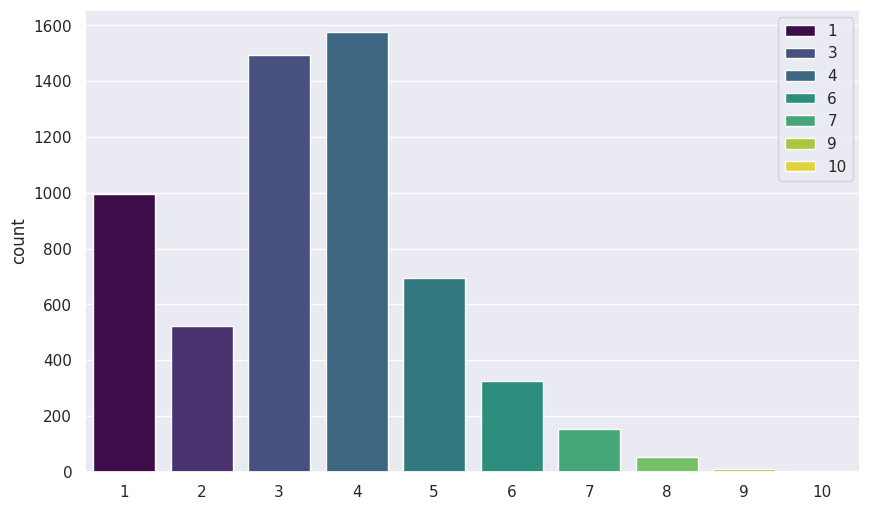

In [59]:
plt.figure(figsize=(10, 6))  # Optional: Set the size of the plot
sns.countplot(x=hash_token_lengths, palette="viridis", hue = hash_token_lengths)

# Contractions present in vocab?

In [62]:
"can't" in tokenizer.vocab

False

In [63]:
"cant" in tokenizer.vocab

False

In [64]:
"cannot" in tokenizer.vocab

True

In [67]:
# So BERT doesn't include words which have symbol in them

In [65]:
# Check if for every subword (which starts with ##), is there a subword without ## as well

In [68]:
# For each token in the vocabulary...
for token in tokenizer.vocab.keys():
    
    # If it's a subword...
    if len(token) >= 2 and token[0:2] == '##':
        if not token[2:] in tokenizer.vocab:
            print('Did not find a token for', token[2:])
            break

Did not find a token for ly


In [69]:
'##ly' in tokenizer.vocab.keys()

True

In [70]:
'ly' in tokenizer.vocab.keys()

False

# Check if names are present in vocab

In [72]:
import wget
import random 

print('Beginning file download with wget module')

url = 'http://www.gutenberg.org/files/3201/files/NAMES.TXT'
wget.download(url, 'first-names.txt')


Beginning file download with wget module


'first-names.txt'

In [74]:
with open('first-names.txt', 'rb') as f:
    names_encoded = f.readlines()

In [76]:
names = []

for name in names_encoded:
    try:
        names.append(name.rstrip().lower().decode('utf-8'))
    except:
        continue

print(len(names_encoded)), print(len(names))

21986
21985


(None, None)

In [77]:
num_names = 0

# For each name in our list...
for name in names:

    # If it's in the vocab...
    if name in tokenizer.vocab:
        # Tally it.
        num_names += 1

print('{:,} names in the vocabulary'.format(num_names))

3,869 names in the vocabulary


In [78]:
num_names/len(tokenizer.vocab.keys())

0.12676102483454557

In [79]:
# So good amount of names present, around 12.7% of total vocab is names

# Check if numbers are present in vocab

In [82]:
cnt = 0
for token in tokenizer.vocab.keys():
    
    if token.isdigit():
        cnt +=1

        if(len(token) > 4):
            print(token)

print(cnt)

881


In [83]:
# Count how many dates between 1600 and 2021 are included.
count = 0 
for i in range(1600, 2021):
    if str(i) in tokenizer.vocab:
        count += 1

print('Vocab includes {:,} of 421 dates from 1600 - 2021'.format(count))

Vocab includes 384 of 421 dates from 1600 - 2021
